In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/energy-efficiency-data-set/energy_efficiency_data.csv


In [2]:
df = pd.read_csv("/kaggle/input/energy-efficiency-data-set/energy_efficiency_data.csv")
df.head()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Relative_Compactness       768 non-null    float64
 1   Surface_Area               768 non-null    float64
 2   Wall_Area                  768 non-null    float64
 3   Roof_Area                  768 non-null    float64
 4   Overall_Height             768 non-null    float64
 5   Orientation                768 non-null    int64  
 6   Glazing_Area               768 non-null    float64
 7   Glazing_Area_Distribution  768 non-null    int64  
 8   Heating_Load               768 non-null    float64
 9   Cooling_Load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


In [4]:
df.isnull().sum()

Relative_Compactness         0
Surface_Area                 0
Wall_Area                    0
Roof_Area                    0
Overall_Height               0
Orientation                  0
Glazing_Area                 0
Glazing_Area_Distribution    0
Heating_Load                 0
Cooling_Load                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,Heating_Load,Cooling_Load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [8]:
scaler = StandardScaler()
X = df.drop(columns=["Heating_Load", "Cooling_Load"])
X_scaled = scaler.fit_transform(X)

y_heating = df["Heating_Load"]
y_cooling = df["Cooling_Load"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_heating, test_size=0.2, random_state=42)

In [10]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mae= mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2= r2_score(y_test, y_pred)

print(f" MAE : {mae:.2f}, RMSE : {rmse:.2f}, R2 Score : {r2:.2f}")

 MAE : 0.35, RMSE : 0.49, R2 Score : 1.00


In [11]:
param_dist = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

random_search = RandomizedSearchCV(RandomForestRegressor(random_state=42), 
                                   param_distributions=param_dist,
                                   n_iter=20, 
                                   cv=5, 
                                   scoring='r2', 
                                   verbose=1, 
                                   n_jobs=-1)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_
print("Best Parameters:", best_params)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 10}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [12]:
grid_params = {
    'n_estimators': [best_params['n_estimators'] - 50, best_params['n_estimators'], best_params['n_estimators'] + 50],
    'max_depth': [best_params['max_depth'] - 10, best_params['max_depth'], best_params['max_depth'] + 10],
    'min_samples_split': [best_params['min_samples_split'] - 1, best_params['min_samples_split'], best_params['min_samples_split'] + 1],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), 
                           param_grid=grid_params, 
                           cv=5, 
                           scoring='r2', 
                           verbose=1, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)
final_best_params = grid_search.best_params_
print("Final Best Parameters:", final_best_params)


Fitting 5 folds for each of 27 candidates, totalling 135 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
95 fits failed out of a total of 135.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

Final Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


In [13]:
final_model = RandomForestRegressor(**final_best_params, random_state=42)
final_model.fit(X_train, y_train)
y_final_pred = final_model.predict(X_test)

# Evaluation Metrics
mae_final = mean_absolute_error(y_test, y_final_pred)
rmse_final = np.sqrt(mean_squared_error(y_test, y_final_pred))
r2_final = r2_score(y_test, y_final_pred)

print(f'Final MAE: {mae_final:.2f}, RMSE: {rmse_final:.2f}, R² Score: {r2_final:.2f}')


Final MAE: 0.35, RMSE: 0.50, R² Score: 1.00


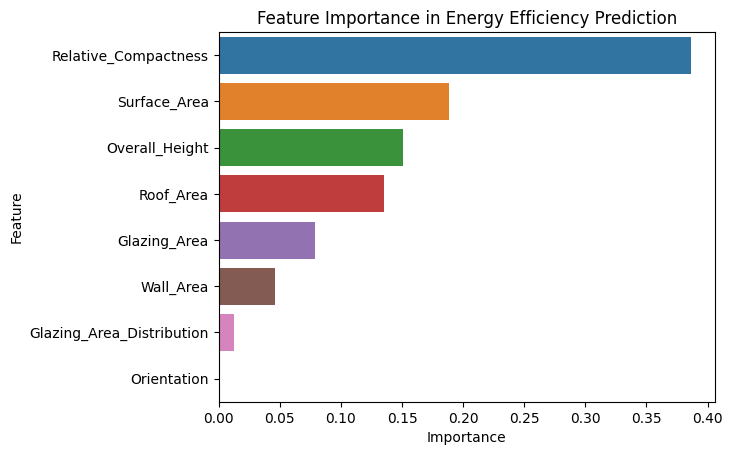

In [14]:
importances = final_model.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance in Energy Efficiency Prediction')
plt.show()


In [15]:
pip install xgboost lightgbm


Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002818 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score 22.155033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

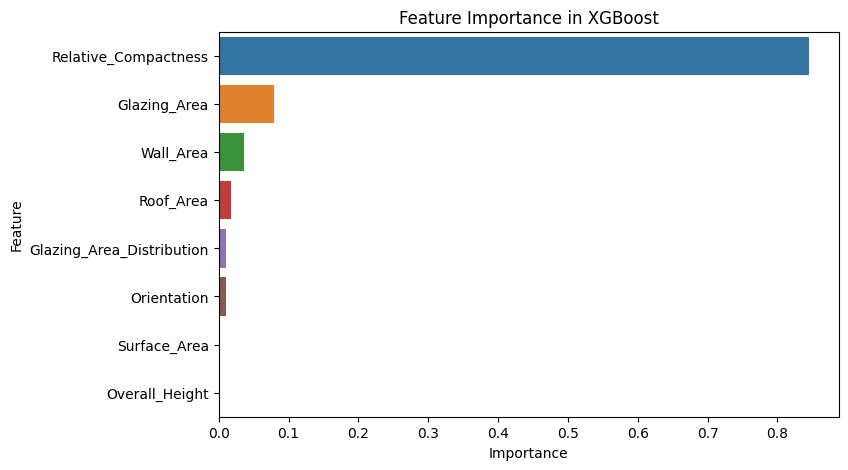

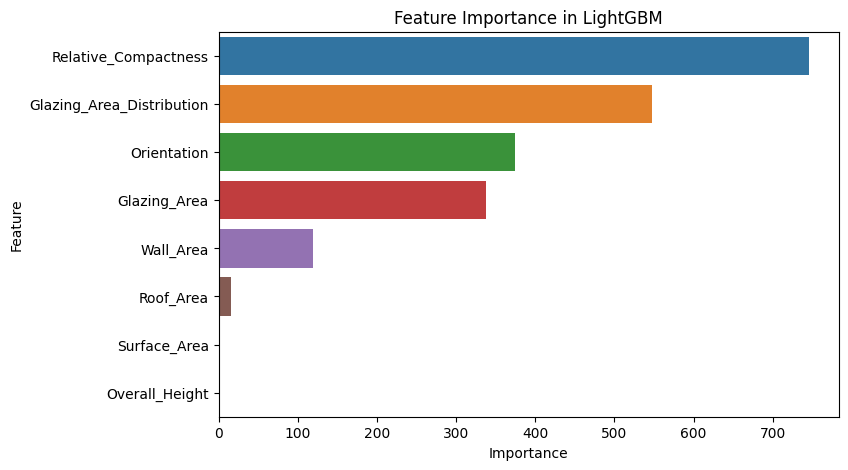

In [16]:
import xgboost as xgb
import lightgbm as lgb


X = df.drop(columns=['Heating_Load', 'Cooling_Load']) 
y_heating = df['Heating_Load']   
y_cooling = df['Cooling_Load']  

X_train, X_test, y_train_heat, y_test_heat = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cool, y_test_cool = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train_heat)
y_pred_xgb_heat = xgb_model.predict(X_test)

xgb_model.fit(X_train, y_train_cool)
y_pred_xgb_cool = xgb_model.predict(X_test)


lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
lgb_model.fit(X_train, y_train_heat)
y_pred_lgb_heat = lgb_model.predict(X_test)

lgb_model.fit(X_train, y_train_cool)
y_pred_lgb_cool = lgb_model.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

print("\n**Heating Load Prediction**")
evaluate_model(y_test_heat, y_pred_xgb_heat, "XGBoost")
evaluate_model(y_test_heat, y_pred_lgb_heat, "LightGBM")

print("\n**Cooling Load Prediction**")
evaluate_model(y_test_cool, y_pred_xgb_cool, "XGBoost")
evaluate_model(y_test_cool, y_pred_lgb_cool, "LightGBM")

def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance in {model_name}')
    plt.show()

plot_feature_importance(xgb_model, "XGBoost")
plot_feature_importance(lgb_model, "LightGBM")


In [17]:
pip install lightgbm


Note: you may need to restart the kernel to use updated packages.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000082 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 8
[LightGBM] [Info] Start training from score 22.155033
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

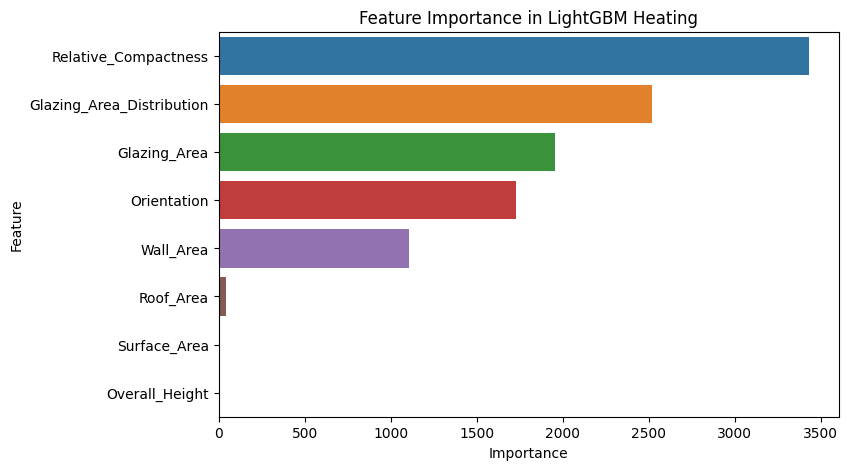

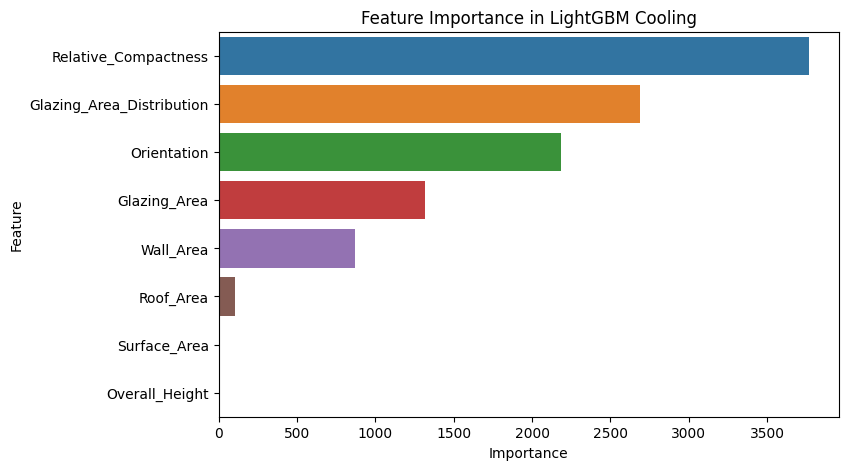

In [18]:
import lightgbm as lgb


X = df.drop(columns=['Heating_Load', 'Cooling_Load'])  
y_heating = df['Heating_Load']   
y_cooling = df['Cooling_Load']   

X_train, X_test, y_train_heat, y_test_heat = train_test_split(X, y_heating, test_size=0.2, random_state=42)
X_train, X_test, y_train_cool, y_test_cool = train_test_split(X, y_cooling, test_size=0.2, random_state=42)

lgb_model_heat = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, boosting_type='gbdt', random_state=42)
lgb_model_heat.fit(X_train, y_train_heat)
y_pred_lgb_heat = lgb_model_heat.predict(X_test)

lgb_model_cool = lgb.LGBMRegressor(n_estimators=500, learning_rate=0.05, boosting_type='gbdt', random_state=42)
lgb_model_cool.fit(X_train, y_train_cool)
y_pred_lgb_cool = lgb_model_cool.predict(X_test)

def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} - MAE: {mae:.2f}, RMSE: {rmse:.2f}, R²: {r2:.2f}")

print("\n**Heating Load Prediction**")
evaluate_model(y_test_heat, y_pred_lgb_heat, "LightGBM Heating")

print("\n**Cooling Load Prediction**")
evaluate_model(y_test_cool, y_pred_lgb_cool, "LightGBM Cooling")

def plot_feature_importance(model, model_name):
    importance = model.feature_importances_
    importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importance})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    plt.figure(figsize=(8, 5))
    sns.barplot(x='Importance', y='Feature', data=importance_df)
    plt.title(f'Feature Importance in {model_name}')
    plt.show()

plot_feature_importance(lgb_model_heat, "LightGBM Heating")
plot_feature_importance(lgb_model_cool, "LightGBM Cooling")


In [19]:
df.to_csv("energy-efficiency.csv")